In [40]:
# Importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


import pickle

%matplotlib inline 
#So plots display in the jupyter notebook environment

avos1_df = pd.read_csv('avos1.csv', sep='"' and',', index_col = 'Current Year Week Ending')


In [41]:
avos1_df.head(15)

,Geography,Timeframe,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
Current Year Week Ending,,,,,,,,,,,,
2023-01-29 00:00:00,Albany,Weekly,Conventional,1.061986,118903.56,20652.13,69264.38,20.83,21055.11,NaN,NaN,NaN
2023-01-22 00:00:00,Albany,Weekly,Conventional,1.087200,145606.29,31914.51,85603.85,15.28,20087.96,NaN,NaN,NaN
2023-01-15 00:00:00,Albany,Weekly,Conventional,1.064087,124806.13,22887.57,71058.74,19.21,22717.32,NaN,NaN,NaN
2023-01-09 00:00:00,Albany,Weekly,Conventional,1.096477,123185.36,22058.54,76314.33,25.01,21389.38,NaN,NaN,NaN
2023-01-29 00:00:00,Atlanta,Weekly,Conventional,0.913555,870655.04,357694.86,23480.73,84.05,99006.04,NaN,NaN,NaN
2023-01-22 00:00:00,Atlanta,Weekly,Conventional,0.945302,825696.78,348170.41,27964.20,113.68,84212.84,NaN,NaN,NaN
2023-01-15 00:00:00,Atlanta,Weekly,Conventional,0.924185,807455.47,352523.78,27575.65,137.14,85555.04,NaN,NaN,NaN
2023-01-09 00:00:00,Atlanta,Weekly,Conventional,0.933794,769668.12,330488.26,44473.04,134.34,86145.08,NaN,NaN,NaN
2023-01-29 00:00:00,Baltimore/Washington,Weekly,Conventional,1.143148,1012144.44,175187.49,419073.10,1627.37,335717.59,NaN,NaN,NaN


TOO MUCH DATA - for attempt to make geo map with avo prices per region

Get rid of some columns from df:

In [42]:
columns_to_drop = ['4046 Units', '4225 Units', '4770 Units', 'Total Bulk and Bags Units','TotalBagged Units', 'SmlBagged Units', 'LrgBagged Units', 'X-LrgBagged Units']

avos1_df = data.drop(columns_to_drop, axis=1)
display(avos1_df.head())

,Geography,Timeframe,Type,ASP Current Year
Current Year Week Ending,,,,
2023-01-29 00:00:00,Albany,Weekly,Conventional,1.061986
2023-01-22 00:00:00,Albany,Weekly,Conventional,1.087200
2023-01-15 00:00:00,Albany,Weekly,Conventional,1.064087
2023-01-09 00:00:00,Albany,Weekly,Conventional,1.096477
2023-01-29 00:00:00,Atlanta,Weekly,Conventional,0.913555


explore data:

In [43]:
#unique geopgrpahy
geography = avos1_df.Geography.unique()

print(geography)


['Albany' 'Atlanta' 'Baltimore/Washington' 'Birmingham/Montgomery' 'Boise'
 'Boston' 'Buffalo/Rochester' 'Charlotte' 'Chicago' 'Cincinnati/Dayton'
 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids'
 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville'
 'Miami/Ft. Lauderdale' 'Nashville' 'Northern New England'
 'New Orleans/Mobile' 'New York' 'Orlando' 'Peoria/Springfield'
 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Portland' 'Providence'
 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'Spokane'
 'St. Louis' 'Syracuse' 'Tampa' 'Toledo' 'West Tex/New Mexico' 'Wichita'
 'California' 'Great Lakes' 'Midsouth' 'Northeast' 'Plains'
 'South Central' 'Southeast' 'West' 'Total U.S.'
 "Source: IRI confidential information. HAB's calculation based in part on data reported by Information Resources, Inc. for the avocado category for Multi-Ou

In [44]:
avos1_df.describe() #get an idea of price range

,ASP Current Year
count,4248.000000
mean,1.328682
std,0.346820
min,0.680492
25%,1.054868
50%,1.271991
75%,1.574943
max,2.764590


<Axes: ylabel='Frequency'>

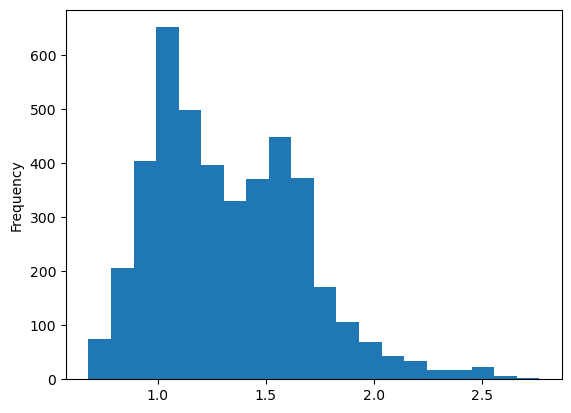

In [45]:
#visualise price spread
avos1_df['ASP Current Year'].plot(kind='hist', bins=20)

In [46]:
#there's a lot of values for each region since it is weekly data, see how many:


In [47]:
avos1_df['Geography'].value_counts().head()


Albany        72
Atlanta       72
Pittsburgh    72
Portland      72
Providence    72
Name: Geography, dtype: int64

Too granular/too much detail for a map/visualisation for each geo area.
Need to GROUP data for each geo area and get an average for those areas
Will put in a new data frame:

In [48]:
group_by_geo = avos1_df.groupby(by=['Geography'])
avos1_df_avg = group_by_geo.mean()




C:\Users\Owner\AppData\Local\Temp\ipykernel_17876\546390429.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avos1_df_avg = group_by_geo.mean()


In [49]:
avos1_df_avg.head(50)

,ASP Current Year
Geography,
Albany,1.364689
Atlanta,1.268823
Baltimore/Washington,1.433007
Birmingham/Montgomery,1.097394
Boise,1.448683
Boston,1.474905
Buffalo/Rochester,1.358253
California,1.411928
Charlotte,1.340748


In [50]:
# looks like average price per region in that year

Now have to geocode it so it can go on a map (this is attempt/notebook number 3!!)

In [51]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [52]:
from shapely.geometry import Point, Polygon
from geopy.geocoders import Bing
from geopy.extra.rate_limiter import RateLimiter
#found documentation on GeoPy and Google for tools above (I could not get two other methods
#to work - ChatGPT suggested GeoPandas with a specific dataset, which I still
#believe could work, but I didn't get there! So this is my last try)

In [54]:
geolocator = Bing(api_key='AvazSyvOPwQAud_-Fb0I57v5WofDMPQtDGkQxQ87ahFUbtgcYkVj25G55UtJH6WH', timeout=30)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2) # This prevents overloading the API with requests, but adds time to the process


geo_dict = {i : geolocator.geocode(i) for i in geography}

display(geo_dict)

GeocoderQueryError: Non-successful status code 400